# **Predictive Analytics : Maternal Health Risk**

- **Nama**: Dewi Safira Permata sari
- **Email**: dwsafperri@gmail.com
- **ID Dicoding**: dwsafperri

# **Domain Proyek**

Kesehatan maternal (ibu hamil) adalah aspek krusial dalam sistem pelayanan kesehatan, karena berhubungan langsung dengan keselamatan ibu dan bayi. Namun, menurut data terbaru dari World Health Organization (WHO), **lebih dari 700 wanita meninggal setiap hari sepanjang tahun 2023 akibat penyebab yang sebenarnya dapat dicegah terkait kehamilan dan persalinan**. Artinya, **setiap 2 menit terjadi satu kematian maternal di dunia.**

Meskipun telah terjadi **penurunan sekitar 40% angka kematian maternal** secara global sejak tahun 2000, angka ini masih sangat tinggi di negara-negara berpendapatan rendah dan menengah ke bawah—**lebih dari 90% dari total kematian maternal pada tahun 2023 terjadi di kelompok negara ini**. Padahal, kematian tersebut bisa dicegah dengan perawatan yang tepat dari tenaga kesehatan profesional, baik sebelum, saat, maupun setelah persalinan.

Dengan kemajuan teknologi machine learning, kita bisa membangun sistem prediksi risiko kesehatan maternal yang dapat membantu tenaga medis mengidentifikasi ibu hamil dengan risiko tinggi. Deteksi dini ini penting agar penanganan medis bisa dilakukan lebih cepat dan akurat, serta berpotensi menyelamatkan banyak nyawa.

# **Referensi**

- World Health Organization. (2025). Maternal Mortality. https://www.who.int/news-room/fact-sheets/detail/maternal-mortality

- Al-Abri, M., Al-Zakwani, I., & Al-Hinai, F. (2024). Predicting maternal risk level using machine learning models. BMC Pregnancy and Childbirth, 24(1), 112.

- Sharma, S., Patel, A., & Gupta, R. (2023). Deep hybrid model for maternal health risk classification in pregnancy: Synergy of ANN and Random Forest. Frontiers in Artificial Intelligence, 6, 1213436.

- Mohammed, A., Arif, M., & Tripathy, B. K. (2022). Ensemble learning-based feature engineering to analyze maternal health risk data. PLOS ONE, 17(10), e0276525.

- Liu, Y., Zhang, H., & Wang, T. (2023). Explainable machine learning models to analyze maternal health. Decision Support Systems, 172, 113157.

- Lakshmi, B., & Rani, S. (2023). Classification of maternal health risks using machine learning methods. Lecture Notes in Networks and Systems, 743, 1066–1078.

- Gupta, R., & Sharma, M. (2025). A machine learning approach for predicting maternal health risks in low-resource settings. Future Internet, 17(5), 190.





# **Business Understanding**

## **Problem Statements**

1. Bagaimana cara mengklasifikasikan risiko kesehatan maternal (low risk, mid risk, high risk) berdasarkan data vital pasien?

2. Apakah model machine learning dapat memberikan klasifikasi risiko yang akurat dan dapat diandalkan untuk membantu pengambilan keputusan dalam dunia medis, khususnya pada kasus maternal?

3. Fitur apa saja yang paling berkontribusi terhadap klasifikasi risiko maternal, dan bagaimana pengaruhnya terhadap tingkat akurasi model?



## **Goals**

1. Mengembangkan sistem klasifikasi risiko kesehatan maternal berbasis data dengan menggunakan parameter medis dasar.

2. Menerapkan dan membandingkan beberapa algoritma machine learning untuk menemukan model yang paling efektif dalam klasifikasi risiko.

3. Mengevaluasi performa model menggunakan metrik evaluasi yang tepat guna memastikan akurasi dan keandalan sistem dalam mendeteksi risiko maternal.

## **Solution Statements**

1. **Melakukan analisis statistik dan membangun model machine learning** untuk mengukur seberapa kuat hubungan serta kontribusi tiap parameter medis dasar (seperti tekanan darah, kadar hemoglobin, usia kehamilan, dan lain-lain) terhadap tingkat risiko kesehatan maternal. Analisis ini bertujuan untuk mengidentifikasi faktor-faktor utama yang paling berpengaruh terhadap klasifikasi risiko, baik rendah, sedang, maupun tinggi.

2. **Menerapkan berbagai algoritma machine learning dan membandingkan hasil performanya** untuk menemukan model dengan akurasi terbaik dalam memprediksi tingkat risiko kesehatan maternal. Model terbaik kemudian digunakan untuk prediksi atau inference risiko pada data baru.

3. **Melakukan analisis menggunakan variabel-variabel medis terkait**, untuk memahami kaitan antara kombinasi faktor medis (seperti tekanan darah sistolik/diastolik dan kadar hemoglobin) dengan tingkat risiko maternal. Hal ini bertujuan memberikan insight bagi tenaga medis dalam melakukan deteksi dini terhadap potensi komplikasi kehamilan.

## **Metodologi**

Tujuan proyek ini adalah memprediksi tingkat risiko kesehatan maternal berdasarkan data medis dasar. Metodologi yang digunakan adalah membangun model klasifikasi dengan menggunakan beberapa algoritma machine learning untuk mengklasifikasikan risiko menjadi rendah, sedang, dan tinggi.



## **Metrik**

Metrik yang digunakan untuk mengevaluasi performa model adalah confusion matrix. Confusion matrix digunakan untuk menghitung akurasi dan performa model klasifikasi.



# **Data Understanding**

Link dataset: https://archive.ics.uci.edu/dataset/863/maternal+health+risk

## **1. Import Library**

In [1]:
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

!pip install optuna
import optuna

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## **2. Load Dataset**

In [2]:
df = pd.read_csv("maternal_health_risk_dataset.csv")
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


### Deskripsi Variabel

| Fitur       | Tipe     | Deskripsi                                                                                                         |
| ----------- | -------- | ----------------------------------------------------------------------------------------------------------------- |
| Age         | Numerik  | Usia ibu hamil dalam tahun, berpengaruh pada risiko komplikasi selama kehamilan                                   |
| SystolicBP  | Numerik  | Tekanan darah sistolik (tekanan saat jantung memompa), diukur dalam mm Hg                                         |
| DiastolicBP | Numerik  | Tekanan darah diastolik (tekanan saat jantung beristirahat), diukur dalam mm Hg                                   |
| BS          | Numerik  | Kadar gula darah (blood sugar) dalam mg/dl, indikator penting untuk risiko diabetes atau komplikasi kehamilan     |
| BodyTemp    | Numerik  | Suhu tubuh dalam derajat Celsius (°F), peningkatan bisa menunjukkan infeksi atau masalah kesehatan lain           |
| HeartRate   | Numerik  | Detak jantung per menit (bpm), bisa mencerminkan kondisi kardiovaskular dan kesehatan umum                        |
| RiskLevel   | Kategori | Label target yang mengklasifikasikan tingkat risiko kesehatan maternal: Low (rendah), Mid (sedang), High (tinggi) |


**Insight :**

- Terdapat 1.014 baris data pasien ibu hamil.
- Terdapat 7 kolom (fitur) yang mempresentasikan data medis dasar serta label risiko kesehatan maternal.
- Tidak ada missing values.

### Deskripsi Statistik

In [4]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


**Insight :**

- Usia (Age) ibu hamil berkisar antara 10 sampai 70 tahun dengan rata-rata sekitar 30 tahun.

- Tekanan darah sistolik (SystolicBP) rata-rata 113 mm Hg, dengan nilai terendah 70 dan tertinggi 160 mm Hg, menunjukkan variasi tekanan darah yang cukup lebar di antara pasien.

- Tekanan darah diastolik (DiastolicBP) rata-rata 76 mm Hg, dengan rentang dari 49 hingga 100 mm Hg.

- Kadar gula darah (BS) berkisar antara 6 sampai 19 mg/dl, dengan rata-rata sekitar 8.7 mg/dl, menunjukkan variasi tingkat gula darah yang cukup signifikan.

- Suhu tubuh (BodyTemp) cukup stabil rata-rata 98.7 °F, dengan nilai maksimum mencapai 103 °F, yang mungkin menunjukkan adanya beberapa kasus demam atau infeksi.

- Detak jantung (HeartRate) rata-rata 74 bpm, dengan nilai minimum yang sangat rendah (7 bpm) yang kemungkinan merupakan data outlier atau kesalahan pencatatan, dan maksimum 90 bpm.

**Hasil Analisis :**

- Variasi tekanan darah dan kadar gula darah yang cukup besar bisa menjadi indikator utama risiko kesehatan maternal yang berbeda-beda.

- Suhu tubuh yang cukup stabil menunjukkan sebagian besar pasien dalam kondisi normal, namun ada sebagian kecil yang mengalami demam tinggi.

- Detak jantung dengan nilai ekstrem rendah (7 bpm) kemungkinan perlu dicek ulang karena bisa jadi data tidak valid.

- Usia ibu hamil yang beragam (10-70 tahun) menunjukkan perlunya model yang mampu mengakomodasi rentang usia yang luas dalam prediksi risiko.



## **3. Exploratory Data Analysis**

### **a. Univariative Analysis**

In [5]:
numerical_feature = ['Age',	'SystolicBP',	'DiastolicBP',	'BS',	'BodyTemp',	'HeartRate']
categorical_feature = ['HeartRate']

#### **Categorical Features**

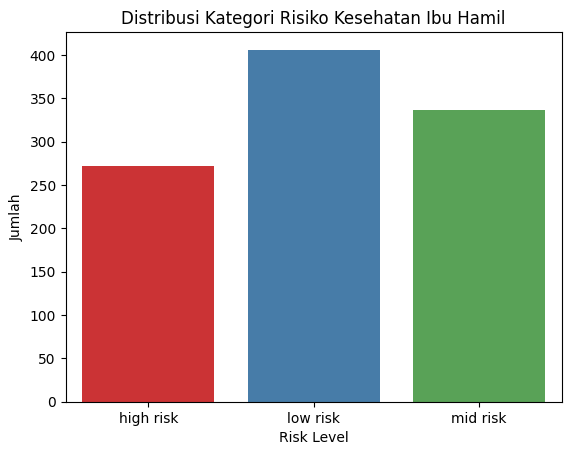

RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: proportion, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='RiskLevel', hue='RiskLevel', data=df, palette='Set1', legend=False)
plt.title('Distribusi Kategori Risiko Kesehatan Ibu Hamil')
plt.xlabel('Risk Level')
plt.ylabel('Jumlah')
plt.show()

# Hitung proporsi
risk_counts = df['RiskLevel'].value_counts(normalize=True) * 100
print(risk_counts)

**Insight :**

- Low Risk merupakan kategori terbanyak dengan proporsi sekitar 40% dari seluruh data. Ini menunjukkan sebagian besar ibu hamil dalam dataset berada dalam kondisi kesehatan yang relatif baik.

- Mid Risk menempati urutan kedua dengan 33%, mengindikasikan bahwa sepertiga populasi berada dalam kondisi kesehatan yang perlu diperhatikan namun belum darurat.

- High Risk hanya mencakup sekitar 27% dari data, artinya jumlah kasus kehamilan dengan risiko tinggi cukup signifikan tapi tidak dominan.

Distribusi kelas cukup seimbang, sehingga tidak terlalu bermasalah untuk model klasifikasi.

#### **Numerical Features**

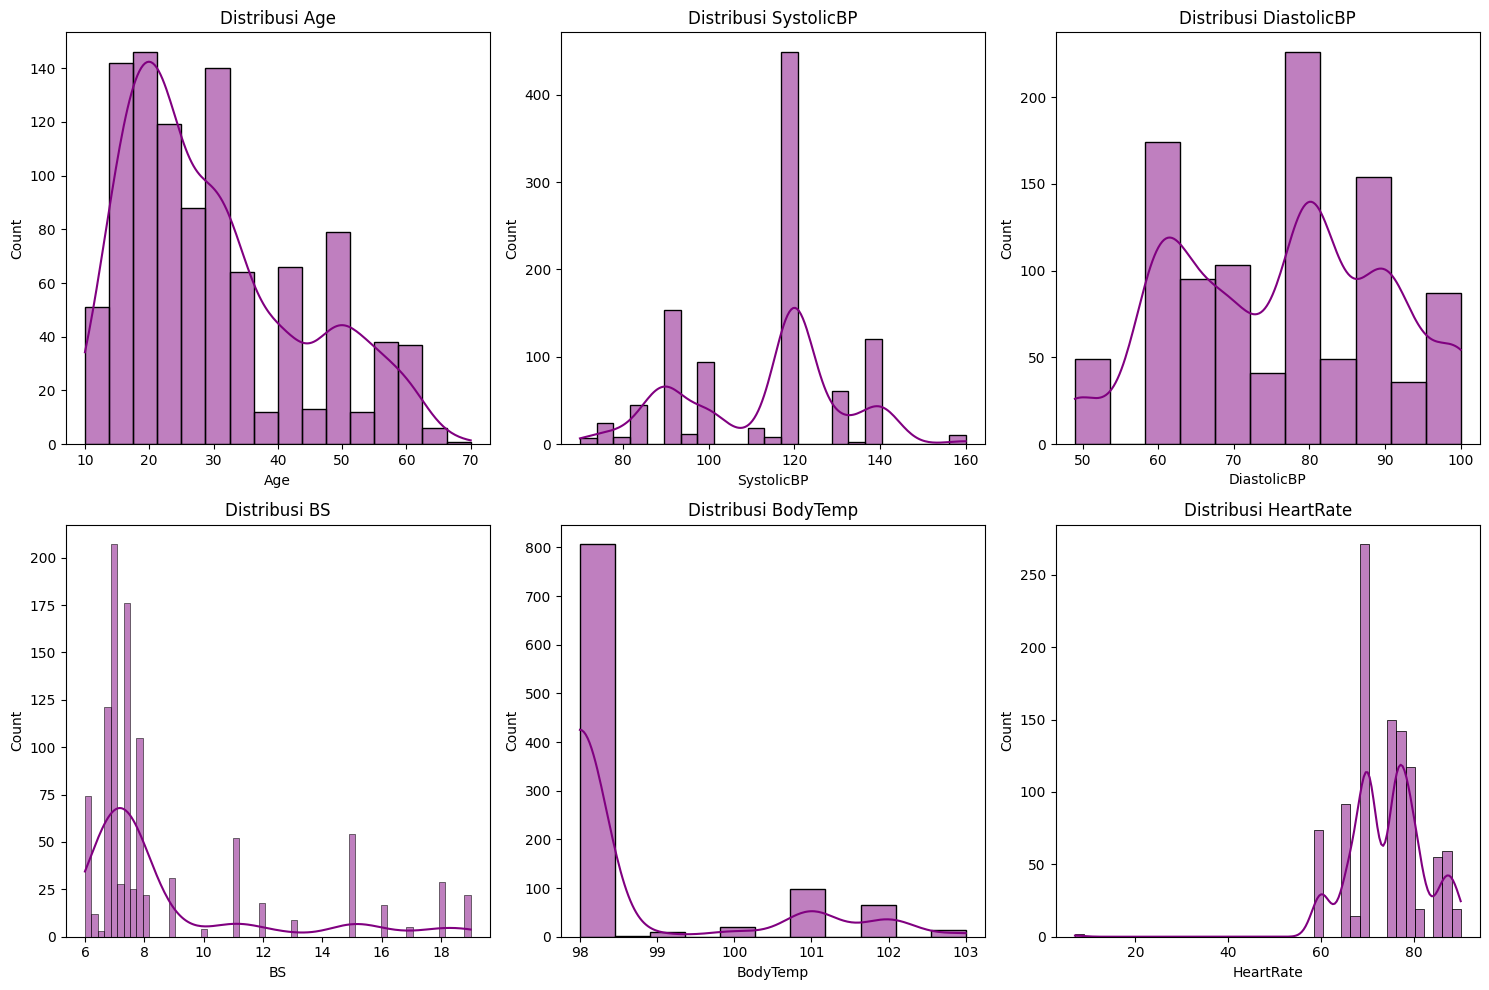

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_feature):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='purple')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Insight**

1.Distribusi Age (Usia)
- Sebagian besar data berada di rentang usia 15–30 tahun, dengan puncak sekitar usia 20 tahun.

- Jumlah individu usia di atas 40 tahun mulai menurun secara signifikan.

- Indikasi bahwa dataset ini kemungkinan besar didominasi oleh orang muda (bisa jadi mahasiswa atau pasien usia muda).

2.Distribusi SystolicBP (Tekanan Darah Sistolik)
- Terjadi puncak tajam di sekitar nilai 120 mmHg, yang merupakan tekanan darah sistolik normal.

- Ada beberapa nilai ekstrim rendah (sekitar 70–80 mmHg) dan tinggi (sekitar 150–160 mmHg).

- Kemungkinan besar data ini mencakup pasien sehat dan pasien hipertensi ringan.

3.Distribusi DiastolicBP (Tekanan Darah Diastolik)
- Distribusi lebih menyebar dibandingkan sistolik.

- Banyak data berada di kisaran 60–90 mmHg, rentang ini masih dalam batas normal.

- Terdapat anomali di sekitar 100 mmHg yang mungkin menunjukkan kasus hipertensi.

4.Distribusi BS (Blood Sugar / Gula Darah)
- Skewed to the right (distribusi condong ke kanan).

- Sebagian besar nilai BS berada antara 6–9, tetapi ada outlier cukup besar hingga 19.

- Ini bisa menunjukkan mayoritas individu memiliki gula darah normal, dengan beberapa kasus hiperglikemia (tinggi).

5.Distribusi BodyTemp (Suhu Tubuh)
- Mayoritas nilai berada di sekitar 98°F, yang merupakan suhu tubuh normal.

- Ada nilai yang lebih tinggi (hingga 103°F), menunjukkan beberapa individu mungkin sedang mengalami demam.

- Distribusi ini juga skewed to the right.

6.Distribusi HeartRate (Denyut Jantung)
- Sebagian besar data berada antara 60–85 bpm, kisaran denyut jantung normal.

- Puncak distribusi di sekitar 75–80 bpm.

- Ada sedikit data dengan nilai denyut jantung ekstrem (rendah atau tinggi), bisa menjadi tanda kondisi abnormal.

### **b. Multivariative Analysis**

#### Distribusi Usia berdasarkan RiskLevel

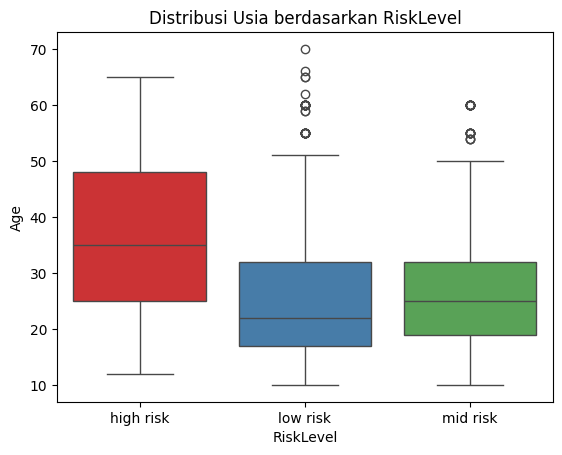

In [8]:
sns.boxplot(x='RiskLevel', hue="RiskLevel", y='Age', data=df, palette='Set1')
plt.title('Distribusi Usia berdasarkan RiskLevel')
plt.show()

  **Insight :**

Umur ibu dengan risiko tinggi cenderung lebih tua dibanding yang risiko rendah dan sedang.

#### Distribusi Tekanan Darah Sistolik berdasarkan RiskLevel

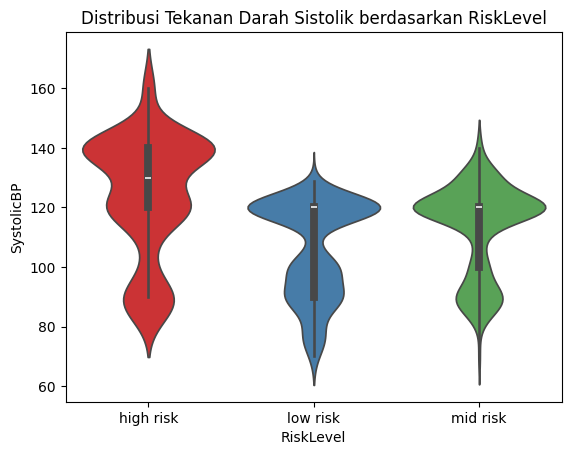

In [9]:
sns.violinplot(x='RiskLevel', hue='RiskLevel', y='SystolicBP', data=df, palette='Set1')
plt.title('Distribusi Tekanan Darah Sistolik berdasarkan RiskLevel')
plt.show()

**Insight :**

Tekanan darah sistolik pada ibu dengan risiko tinggi menunjukkan rentang nilai yang lebih tinggi dan lebih bervariasi dibanding risiko rendah.

Distribusi Tekanan Darah Diastolik berdasarkan RiskLevel

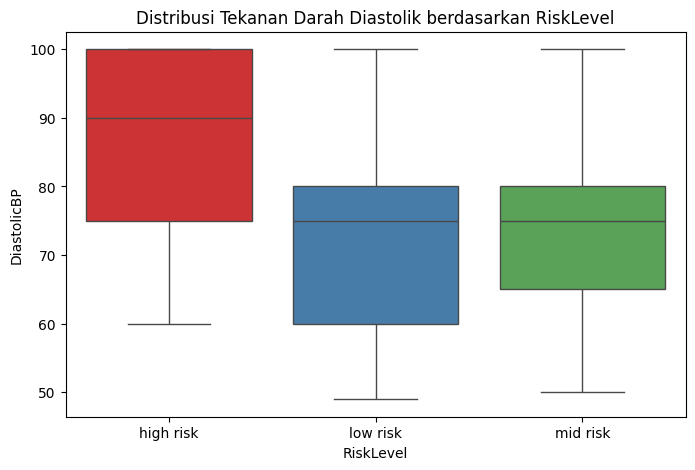

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='RiskLevel', hue='RiskLevel', y='DiastolicBP', palette='Set1')
plt.title('Distribusi Tekanan Darah Diastolik berdasarkan RiskLevel')
plt.show()

**Insight :**

Tekanan darah diastolik cenderung lebih tinggi pada kelompok risiko tinggi dibandingkan dengan kelompok risiko rendah dan sedang.

#### Distribusi Gula Darah berdasarkan RiskLevel

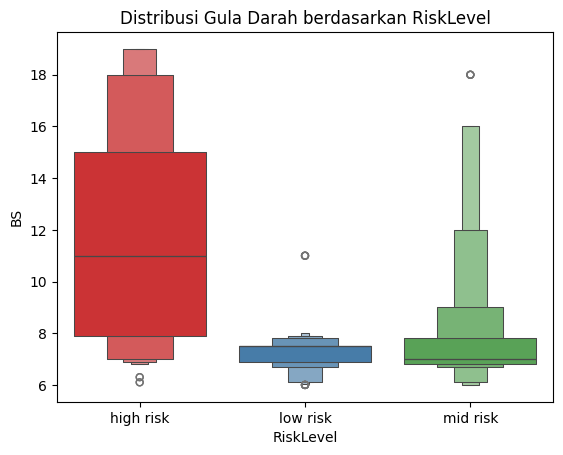

In [11]:
sns.boxenplot(x='RiskLevel', hue='RiskLevel', y='BS', data=df, palette='Set1')
plt.title('Distribusi Gula Darah berdasarkan RiskLevel')
plt.show()

**Insight :**

Kadar gula darah pada ibu dengan risiko tinggi tampak memiliki nilai tengah dan distribusi yang lebih besar dibandingkan kelompok risiko lainnya.

#### Distribusi Suhu Tubuh berdasarkan RiskLevel

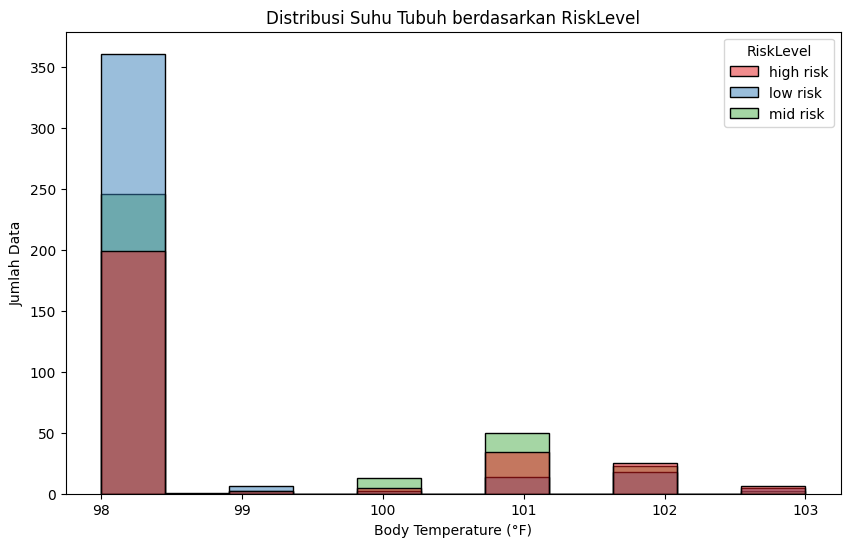

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='BodyTemp', hue='RiskLevel', palette='Set1')
plt.title('Distribusi Suhu Tubuh berdasarkan RiskLevel')
plt.xlabel('Body Temperature (°F)')
plt.ylabel('Jumlah Data')
plt.show()

**Insight :**

Suhu tubuh ibu dengan risiko tinggi sedikit lebih tersebar pada rentang suhu yang lebih tinggi daripada risiko rendah.

#### Distribusi Detak Jantung berdasarkan RiskLevel

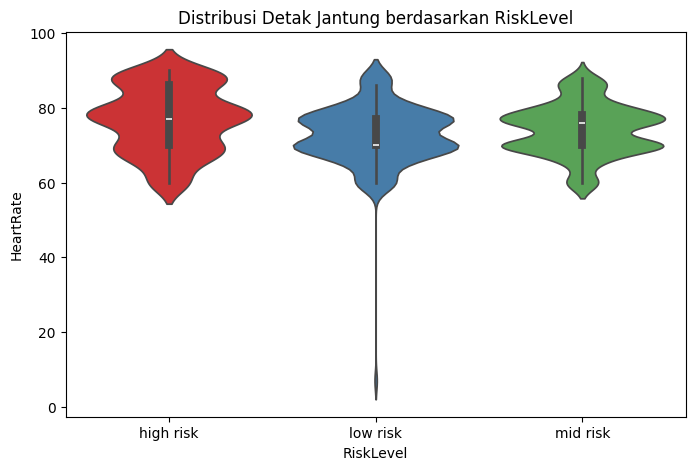

In [13]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='RiskLevel', hue='RiskLevel', y='HeartRate', palette='Set1')
plt.title('Distribusi Detak Jantung berdasarkan RiskLevel')
plt.show()

**Insight :**

Detak jantung pada kelompok risiko tinggi memiliki variasi yang lebih lebar dan median yang sedikit lebih tinggi dibandingkan kelompok risiko rendah.

## **4. Data Preparation**

### Handling Duplicate Data

In [14]:
df.duplicated().sum()

np.int64(562)

**Insight :**

Terdapat 562 data duplicate.

In [15]:
clean_df = df.drop_duplicates()
clean_df.duplicated().sum()

np.int64(0)

### Handling Missing Values

In [16]:
clean_df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


**Insight :**

Tidak terdapat missing values.

### Menangani Outlier dengan IQR Method

In [17]:
clean_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


**Insight :**

- HeartRate (detak jantung): nilai minimum 7 bpm — ini sangat rendah banget dan hampir pasti bukan nilai fisiologis normal manusia (normalnya sekitar 60–100 bpm). Jadi ini kemungkinan data error atau outlier ekstrim.

- SystolicBP (tekanan darah sistolik): minimum 70 mm Hg — ini termasuk rendah tapi masih mungkin (hipotensi berat), tapi harus dicek ulang apakah ini valid.

- DiastolicBP (tekanan darah diastolik): minimum 49 mm Hg — cukup rendah tapi masih mungkin.

- BS (kadar gula darah): maksimum 19.0 — tergantung satuan (mg/dL atau mmol/L), tapi ini bisa jadi outlier jika satuannya mg/dL karena normalnya sekitar 70–140 mg/dL. Tapi kalau ini dalam mmol/L, 19 itu tinggi banget.

**Temuan anomali :**

- Detak jantung minimum 7 bpm (terlalu rendah, outlier)

- Perlu dicek validitas data tekanan darah dan gula darah, tapi nilai ekstrem HeartRate dan BodyTemp jelas anomali.

In [18]:
clean_df.shape

(452, 7)

In [19]:
# Mengganti Nilai Outlier dengan Batas Atas dan Batas Bawah Data

for i in clean_df.select_dtypes(include='number'):
    Q1 = clean_df[i].quantile(0.25)
    Q3 = clean_df[i].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    clean_df[i] = clean_df[i].mask(clean_df[i] > maximum, maximum)
    clean_df[i] = clean_df[i].mask(clean_df[i] < minimum, minimum)

<ipython-input-19-e0e5bd4b45b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[i] = clean_df[i].mask(clean_df[i] > maximum, maximum)
<ipython-input-19-e0e5bd4b45b5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[i] = clean_df[i].mask(clean_df[i] < minimum, minimum)
<ipython-input-19-e0e5bd4b45b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

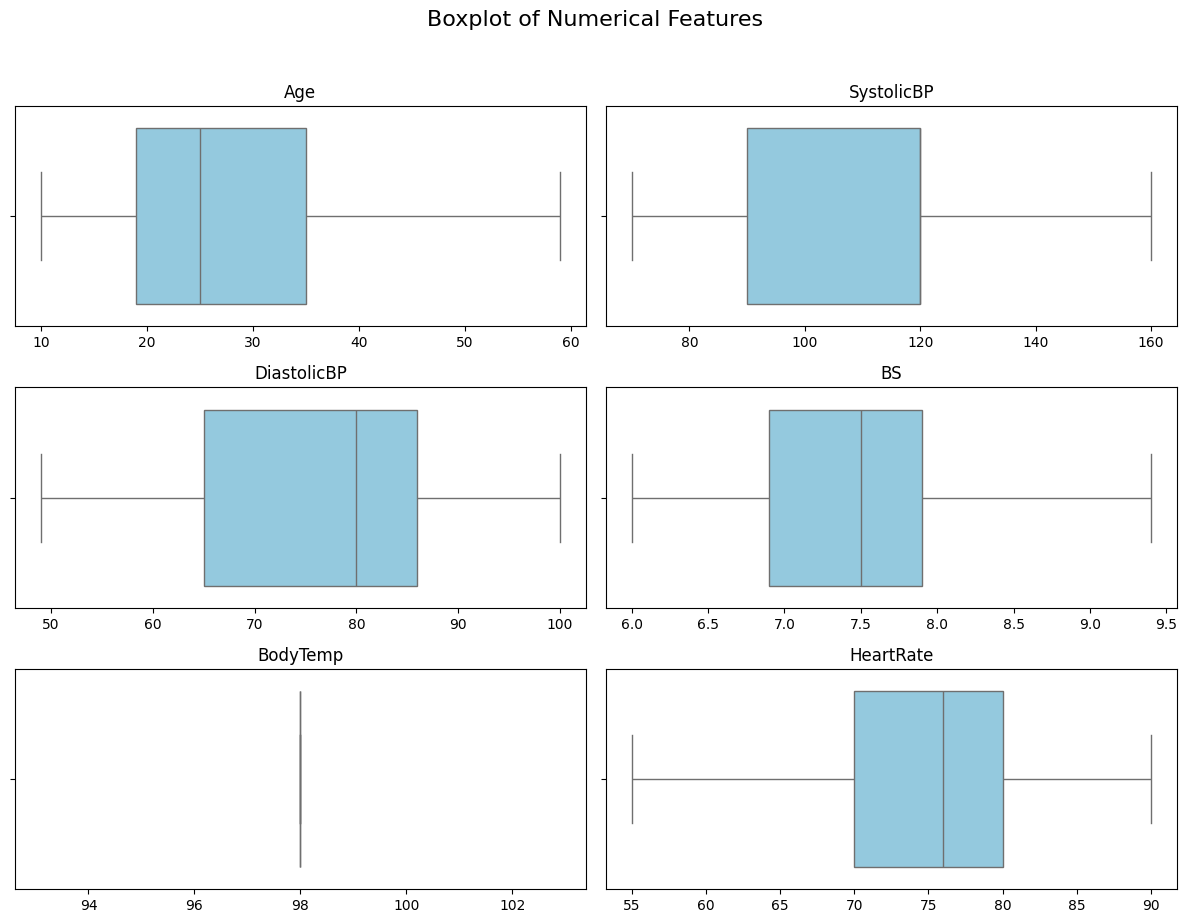

In [20]:
# Buat grid 3x3
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Loop fitur dan plot
for i, feature in enumerate(numerical_feature):
    sns.boxplot(data=clean_df, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot yang tidak dipakai (jika jumlah fitur < jumlah grid)
for j in range(len(numerical_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Agar tidak ketimpa judul
plt.show()

**Insight :**

**1.Age**
- Sebaran usia cukup lebar, berkisar dari sekitar 10 hingga 60 tahun.

- Mayoritas data (IQR) berada antara sekitar 20 hingga 35 tahun.

- Median usia sekitar 26–30 tahun, yang menunjukkan mayoritas ibu hamil berada di usia produktif.

- Distribusi cukup simetris dan tidak ada outlier setelah pembersihan.

**2.SystolicBP**
- Nilai berkisar dari sekitar 70 hingga 160 mm Hg.

- IQR berada di kisaran 100 hingga 130 mm Hg, dengan median sekitar 120 mm Hg, yang termasuk dalam kategori normal.

- Distribusi tampak sedikit skew ke kiri (lebih banyak nilai tinggi), tapi tanpa outlier ekstrem.

**3.DiastolicBP**
- Rentang sekitar 50–100 mm Hg, dengan IQR antara 65–90 mm Hg.

- Median sekitar 80 mm Hg, masih tergolong normal.

- Distribusi simetris dan sudah bersih dari outlier.

**4.BS (Blood Sugar)**
- Nilai berkisar dari 6.0 sampai sekitar 9.5 mg/dL (jika satuan sesuai asumsi).

- IQR sekitar 7.0–8.0, median sedikit di atas 7.5.

- Ini menunjukkan sebagian besar subjek memiliki kadar gula yang cukup stabil.

- Tidak tampak nilai ekstrim.

**5.BodyTemp**
- Hampir semua data berada di 98 °F, sangat sedikit variasi.

- Boxplotnya hampir seperti satu garis vertikal, menandakan data sangat homogen.

- Ini bisa jadi indikasi bahwa fitur ini tidak terlalu informatif (low variance feature) atau terjadi pembulatan.

**6.HeartRate**
- Rentang antara sekitar 55–90 bpm.

- IQR antara 70–80 bpm, median sekitar 75 bpm, tergolong normal.

- Distribusi simetris dan bersih dari outlier.

**Kesimpulan :**

- Setelah outlier dibersihkan, sebagian besar fitur numerik memiliki distribusi yang baik dan simetris.

- BodyTemp terlihat sangat homogen dan mungkin kurang informatif untuk prediksi karena variasinya sangat kecil.

- Fitur-fitur seperti Age, SystolicBP, dan HeartRate menunjukkan distribusi yang bagus dan akan berguna dalam klasifikasi tingkat risiko maternal.

In [21]:
clean_df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

### Encoding Data Kategorikal

Encoding data dilakukan untuk variabel kategorikal `RiskLevel` yaitu tingkat risiko kehamilan (apakah termasuk low risk, mid risk, atau high risk).


In [22]:
# Membuat encoding numerik untuk variabel kategorikal 'RiskLevel'
risk_mapping = {
    "low risk": 0,
    "mid risk": 1,
    "high risk": 2
}

clean_df['RiskLevel'] = clean_df['RiskLevel'].map(risk_mapping)

<ipython-input-22-621d889f74ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['RiskLevel'] = clean_df['RiskLevel'].map(risk_mapping)


In [23]:
clean_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,9.4,98.0,86,2
1,35,140,90,9.4,98.0,70,2
2,29,90,70,8.0,98.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,1
674,15,100,60,6.0,98.0,80,0
703,15,100,49,7.6,98.0,77,0
704,12,100,50,6.0,98.0,70,1


**Insight :**

Variabel ini di-encode menjadi nilai numerik untuk memudahkan proses pemodelan klasifikasi. Setiap kategori dikonversi menjadi angka, misalnya:

- low risk → 0

- mid risk → 1

- high risk → 2

In [24]:
list(clean_df.columns)

['Age',
 'SystolicBP',
 'DiastolicBP',
 'BS',
 'BodyTemp',
 'HeartRate',
 'RiskLevel']

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Membentuk variabel X sebagai pengaruh dari target
X = clean_df.drop(['RiskLevel'], axis=1)

# Membentuk variabel y sebagai target
y = clean_df['RiskLevel']

# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [26]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (361, 6)
Ukuran X_test:  (91, 6)
Ukuran y_train:  (361,)
Ukuran y_test:  (91,)


In [27]:
print(f'Total X of sample in whole dataset: {len(X)}')
print(f'Total X_train of sample in train dataset: {len(X_train)}')
print(f'Total X_test of sample in test dataset: {len(X_test)}')

Total X of sample in whole dataset: 452
Total X_train of sample in train dataset: 361
Total X_test of sample in test dataset: 91


**Insight :**

- Dataset terdiri dari 452 sampel, yang dibagi menjadi data latih (361 sampel atau 80%) dan data uji (91 sampel atau 20%). Ini adalah pembagian umum yang sering digunakan dalam machine learning untuk memastikan model memiliki cukup data untuk belajar sekaligus cukup data untuk evaluasi.

- Setiap sampel memiliki 6 fitur (kolom), yaitu BS, SystolicBP, DiastolicBP, HeartRate, Age, dan BodyTemp. Fitur-fitur ini digunakan untuk memprediksi target RiskLevel.

- Jumlah data latih dan uji sesuai dengan total data yang ada (361 + 91 = 452). Ini menunjukkan proses pembagian data telah dilakukan dengan benar.

- Penggunaan random_state=30 memastikan bahwa setiap kali kode dijalankan, pembagian data tetap konsisten. Ini penting untuk reprodusibilitas dalam eksperimen machine learning.

Secara keseluruhan, pembagian data sudah tepat dan siap digunakan untuk proses pelatihan dan evaluasi model.

### Standarisasi

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Fitur numerik
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Baru ubah ke numpy array kalau emang dibutuhkan
X_train = X_train.values
X_test = X_test.values

**Insight :**

Normalisasi Data (Scaling)

- Fitur numerik (Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate) dinormalisasi menggunakan MinMaxScaler.

- MinMaxScaler mengubah nilai setiap fitur agar berada dalam rentang 0 hingga 1.

- Tujuannya adalah untuk menyamakan skala antar fitur, terutama penting bagi algoritma yang sensitif terhadap skala seperti KNN, SVM, atau regresi logistik.

Pemisahan Fit dan Transform

- `scaler.fit()` hanya dilakukan pada data latih (X_train). Ini sesuai praktik yang benar agar informasi dari data uji tidak bocor ke model (data leakage).
- Kemudian,` transform()` diterapkan pada X_train dan X_test menggunakan parameter dari hasil fit pada X_train.

Konversi ke Numpy Array

- Setelah scaling, data dikonversi ke format array `(.values`). Ini biasanya dilakukan jika model yang digunakan memerlukan input dalam bentuk array.

## **5. Modeling**

### a. XGBoost

In [29]:
def evaluate_model(true_labels, predicted_labels, plot_title, class_labels=None):
    if class_labels is None:
        class_labels = [2, 0, 1]

    # Menampilkan classification report dengan label yang disediakan
    print(classification_report(true_labels, predicted_labels, target_names=[str(label) for label in class_labels]))

    # Membuat confusion matrix plot
    fig, axis = plt.subplots(figsize=(10, 5))
    matrix = ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax=axis, labels=class_labels)

    axis.set_xticklabels([str(label) for label in class_labels], rotation=90)
    axis.set_yticklabels([str(label) for label in class_labels])

    axis.grid(False)
    axis.set_title(plot_title)
    plt.tight_layout()
    plt.show()

In [30]:
import pandas as pd
import optuna
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ambil X dan y dari data
X = clean_df.drop(columns=["RiskLevel"])
y = clean_df["RiskLevel"]  # <-- target langsung dari RiskLevel

# Encode RiskLevel ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_nama = le.classes_
num_class = len(target_nama)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert X ke numpy array
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Memanggil fungsi XGBClassifier dari library sklearn
model_xgb = XGBClassifier(
    max_depth=5,
    n_estimators=168,
    learning_rate=0.04396509567813328,
    random_state=9,
    n_jobs=-1,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    scale_pos_weight=[1.0, 2.2, 2.5]  # Sesuaikan dengan distribusi kelas
)

# Melatih model XGBoost dengan data training pada X dan y
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04396509567813328, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=168, n_jobs=-1, num_class=3,
              num_parallel_tree=None, ...)

In [31]:
# Prediksi dengan model terbaik
pred_xgb = model_xgb.predict(X_test)

# Ubah encoded prediction dan true label ke label string
y_pred_labels = le.inverse_transform(pred_xgb)
y_test_labels = le.inverse_transform(y_test)

# Menampilkan akurasi model
xgb = accuracy_score(y_test, pred_xgb)
accuracy_xgboost= round(accuracy_score(y_test, pred_xgb)*100,2)
print("Hasil akurasi model xgboost: ", accuracy_xgboost,"%")

Hasil akurasi model xgboost:  65.93 %


              precision    recall  f1-score   support

           0       0.65      0.91      0.76        47
           1       0.45      0.19      0.27        26
           2       0.86      0.67      0.75        18

    accuracy                           0.66        91
   macro avg       0.65      0.59      0.59        91
weighted avg       0.64      0.66      0.62        91



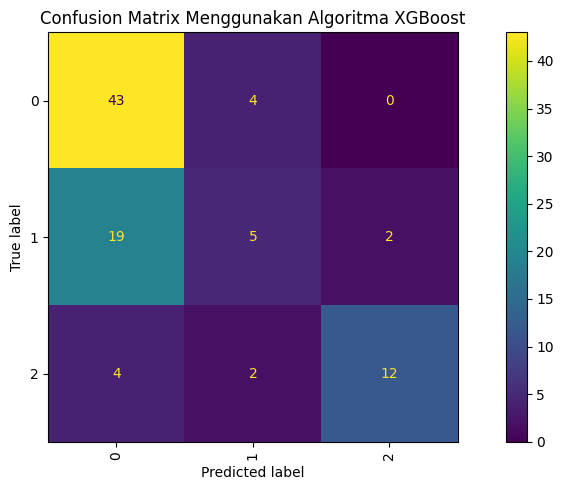

In [32]:
evaluate_model(y_test_labels, y_pred_labels, "Confusion Matrix Menggunakan Algoritma XGBoost", class_labels=target_nama)

Confusion Matrix (XGBoost)

|                     | Predicted Low (0)   | Predicted Mid (1)  | Predicted High (2) |
| ------------------- | ------------------- | ------------------ | ------------------ |
| **Actual Low (0)**  | 43 (True Negative)  | 4 (False Positive) | 0                  |
| **Actual Mid (1)**  | 19 (False Negative) | 5 (True Positive)  | 2 (False Negative) |
| **Actual High (2)** | 4 (False Negative)  | 2 (False Positive) | 12 (True Positive) |


**Penjelasan:**

* **True Positive (TP)** = 5 (Mid → Mid), 12 (High → High)
* **True Negative (TN)** = 43 (Low → Low)
* **False Positive (FP)** = 4 (Low → Mid), 2 (High → Mid)
* **False Negative (FN)** = 19 (Mid → Low), 4 (High → Low), 2 (Mid → High)

Model akurat untuk kelas **Low Risk**, namun kesulitan membedakan kelas **Mid** dan sebagian **High**. Potensi perbaikan pada penanganan kelas imbang dan klasifikasi risiko menengah.


In [33]:
def objective(trial):
    # Ambil hyperparameter dari trial
    max_depth = trial.suggest_int('max_depth', 3, 15)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    random_state = trial.suggest_int('random_state', 0, 1000)

    # Buat model XGBClassifier dengan hyperparameter dari trial
    model_xgb = XGBClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=random_state,
        n_jobs=-1,
        eval_metric='mlogloss',
        objective='multi:softprob',
        num_class=num_class
    )
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Buat study dan optimize
study_xgboost = optuna.create_study(direction='maximize')
study_xgboost.optimize(objective, n_trials=50)

# Print hasil tuning terbaik
print("Best hyperparameters: ", study_xgboost.best_params)
print("Best accuracy: ", study_xgboost.best_value)

# Buat model baru dengan hyperparameter terbaik
best_model = XGBClassifier(
    max_depth=study_xgboost.best_params['max_depth'],
    n_estimators=study_xgboost.best_params['n_estimators'],
    learning_rate=study_xgboost.best_params['learning_rate'],
    random_state=study_xgboost.best_params['random_state'],
    n_jobs=-1,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=num_class
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

[I 2025-05-25 14:29:09,187] A new study created in memory with name: no-name-cd2536ce-407e-4641-9350-f1a75a8a977d
[I 2025-05-25 14:29:09,523] Trial 0 finished with value: 0.6813186813186813 and parameters: {'max_depth': 4, 'n_estimators': 160, 'learning_rate': 0.0007596149094108323, 'random_state': 777}. Best is trial 0 with value: 0.6813186813186813.
[I 2025-05-25 14:29:13,463] Trial 1 finished with value: 0.6483516483516484 and parameters: {'max_depth': 9, 'n_estimators': 182, 'learning_rate': 0.00046209897373304285, 'random_state': 235}. Best is trial 0 with value: 0.6813186813186813.
[I 2025-05-25 14:29:15,667] Trial 2 finished with value: 0.6703296703296703 and parameters: {'max_depth': 11, 'n_estimators': 134, 'learning_rate': 0.016884317525656466, 'random_state': 968}. Best is trial 0 with value: 0.6813186813186813.
[I 2025-05-25 14:29:16,770] Trial 3 finished with value: 0.6263736263736264 and parameters: {'max_depth': 15, 'n_estimators': 120, 'learning_rate': 0.003250854994848

Best hyperparameters:  {'max_depth': 3, 'n_estimators': 106, 'learning_rate': 0.00011970255593399465, 'random_state': 726}
Best accuracy:  0.7032967032967034


              precision    recall  f1-score   support

           0       0.66      0.98      0.79        47
           1       1.00      0.12      0.21        26
           2       0.83      0.83      0.83        18

    accuracy                           0.70        91
   macro avg       0.83      0.64      0.61        91
weighted avg       0.79      0.70      0.63        91



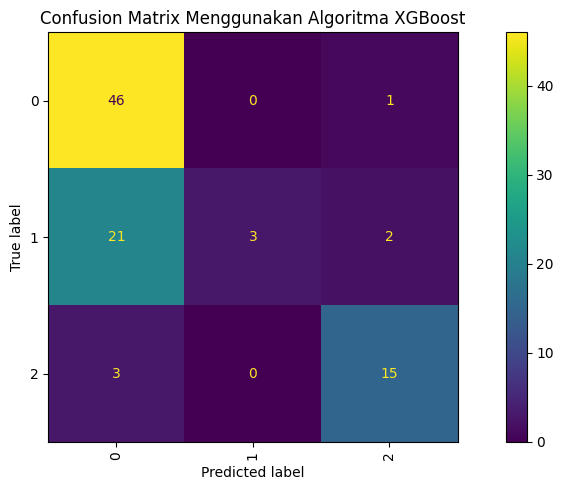

In [34]:
y_pred = best_model.predict(X_test)

evaluate_model(y_test, y_pred, "Confusion Matrix Menggunakan Algoritma XGBoost", class_labels=target_nama)

Confusion Matrix (XGBoost) After Tuning

|                     | Predicted Low (0)   | Predicted Mid (1) | Predicted High (2) |
| ------------------- | ------------------- | ----------------- | ------------------ |
| **Actual Low (0)**  | 46 (True Negative)  | 0                 | 1 (False Positive) |
| **Actual Mid (1)**  | 21 (False Negative) | 3 (True Positive) | 2 (False Negative) |
| **Actual High (2)** | 3 (False Negative)  | 0                 | 15 (True Positive) |

Ringkasan Kinerja:

* **Low Risk (0)**

  * Precision: 0.66, Recall: 0.98
  * Hampir semua low risk diprediksi benar.
  * Banyak prediksi kelas lain salah dikira low.

* **Mid Risk (1)**

  * Precision: 1.00, Recall: 0.12
  * Hanya 3 dari 26 data mid risk diprediksi benar.
  * Model sangat buruk dalam mengenali mid risk.

* **High Risk (2)**

  * Precision: 0.83, Recall: 0.83
  * Kinerja cukup baik dan stabil.

Kesimpulan:

* Model cenderung **over-predict ke kelas Low Risk**.
* **Mid Risk sulit dikenali**, meskipun precision-nya tinggi (karena hanya sedikit yang diprediksi ke kelas ini).
* **Akurasi keseluruhan 70%**, tapi distribusi kinerjanya tidak seimbang.
* Perlu perbaikan khusus pada kelas Mid Risk, seperti penyeimbangan data atau tuning parameter.


### b. Support Vector Machine

In [35]:
# Buat model SVM dengan kernel 'rbf' (default)
model_svm = SVC(kernel='rbf', random_state=42, class_weight='balanced')

# Latih model
model_svm.fit(X_train, y_train)

# Prediksi data test
y_pred_encoded = model_svm.predict(X_test)

y_pred_labels = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test)

In [36]:
# Hitung akurasi
accuracy_svm = round(accuracy_score(y_test, y_pred_encoded)*100,2)
print(f"Akurasi model SVM: {accuracy_svm}%")

Akurasi model SVM: 53.85%


              precision    recall  f1-score   support

           0       0.64      0.53      0.58        47
           1       0.38      0.58      0.46        26
           2       0.69      0.50      0.58        18

    accuracy                           0.54        91
   macro avg       0.57      0.54      0.54        91
weighted avg       0.58      0.54      0.55        91



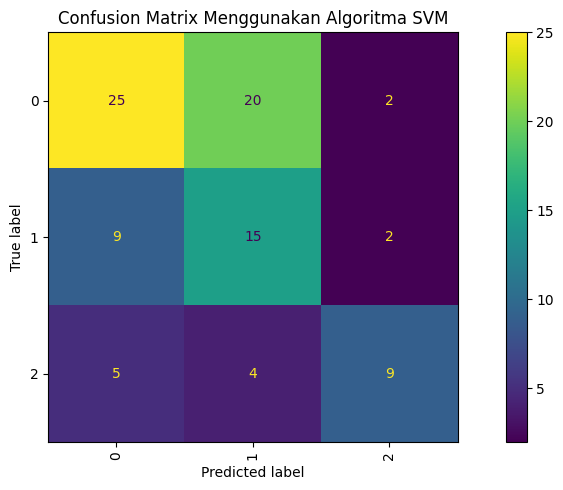

In [37]:
# Tampilkan evaluasi
evaluate_model(y_test_labels, y_pred_labels, "Confusion Matrix Menggunakan Algoritma SVM", class_labels=target_nama)

Confusion Matrix (SVM)

|                     | Predicted Low (0)  | Predicted Mid (1)   | Predicted High (2) |
| ------------------- | ------------------ | ------------------- | ------------------ |
| **Actual Low (0)**  | 25                 | 20 (False Positive) | 2                  |
| **Actual Mid (1)**  | 9 (False Negative) | 15                  | 2                  |
| **Actual High (2)** | 5 (False Negative) | 4                   | 9                  |

Ringkasan Metrik:

* **Accuracy**: 54%
* **Macro avg F1-score**: 0.54
* **Weighted avg F1-score**: 0.55


Per Kelas:

* **Low Risk (0)**

  * Precision: 0.64, Recall: 0.53
  * Banyak salah dikira Mid (20 kasus).

* **Mid Risk (1)**

  * Precision: 0.38, Recall: 0.58
  * Recall lumayan, tapi precision rendah → banyak prediksi Mid yang salah.

* **High Risk (2)**

  * Precision & Recall: 0.69 & 0.50
  * Separuh data High Risk berhasil dikenali.

Kesimpulan:

* Model **tidak stabil** antar kelas.
* Banyak **kesalahan prediksi ke kelas Mid**, baik dari Low maupun High.
* Perlu peningkatan pada pemisahan antar kelas, terutama Low dan Mid.


In [38]:
# def objective(trial):
#     kernel = trial.suggest_categorical('kernel', ['rbf', 'poly', 'sigmoid'])

#     params = {
#         'C': trial.suggest_float('C', 1e-3, 100.0, log=True),
#         'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
#         'kernel': kernel,
#         'class_weight': 'balanced',
#         'random_state': 42,
#     }

#     # Hanya tambahkan degree jika kernel poly
#     if kernel == 'poly':
#         params['degree'] = trial.suggest_int('degree', 2, 5)

#     model = SVC(**params)

#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     return acc

# # Buat dan jalankan optimasi Optuna
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# print("Best hyperparameters:", study.best_params)
# print("Best accuracy:", study.best_value)

In [39]:
# model_best.fit(X_train, y_train)
# y_pred_best = model_best.predict(X_test)

# # Ubah hasil prediksi dan label asli ke nama kelas (bukan angka)
# y_pred_labels = le.inverse_transform(y_pred_best)
# y_test_labels = le.inverse_transform(y_test)

# # Hitung akurasi
# accuracy_svm = round(accuracy_score(y_test, y_pred_best)*100, 2)
# print(f"Akurasi model SVM (tuning Optuna): {accuracy_svm}%")

# # Evaluasi dengan confusion matrix (fungsi evaluate_model sudah kamu punya)
# evaluate_model(y_test_labels, y_pred_labels, "Confusion Matrix Menggunakan Algoritma SVM (Optuna)", class_labels=target_nama)

### c. KNeighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model KNN (default k=5)
model_knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
model_knn.fit(X_train, y_train)

# Prediksi
y_pred = model_knn.predict(X_test)

# Ubah ke label string (jika kamu ingin evaluasi berbasis label asli)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

In [41]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Akurasi
accuracy_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Akurasi model KNN: {accuracy_knn}%")

Akurasi model KNN: 61.54%


              precision    recall  f1-score   support

           0       0.59      0.94      0.72        47
           1       0.62      0.19      0.29        26
           2       0.88      0.39      0.54        18

    accuracy                           0.62        91
   macro avg       0.70      0.51      0.52        91
weighted avg       0.65      0.62      0.56        91



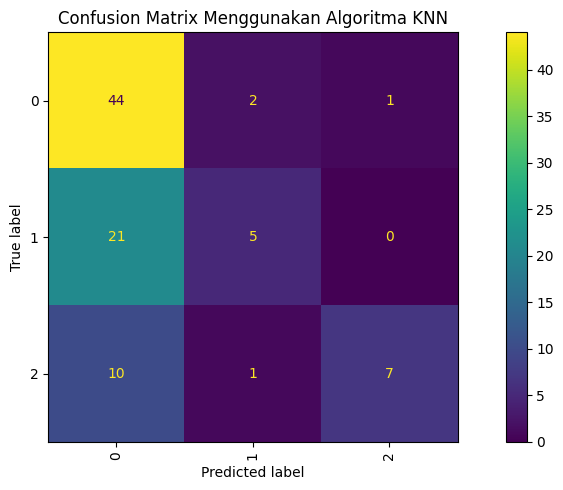

In [43]:
# Confusion Matrix
evaluate_model(y_test_labels, y_pred_labels, "Confusion Matrix Menggunakan Algoritma KNN", class_labels=target_nama)


Confusion Matrix (KNN)

|                     | Predicted Low (0)   | Predicted Mid (1) | Predicted High (2) |
| ------------------- | ------------------- | ----------------- | ------------------ |
| **Actual Low (0)**  | 44                  | 2                 | 1                  |
| **Actual Mid (1)**  | 21 (False Negative) | 5                 | 0                  |
| **Actual High (2)** | 10 (False Negative) | 1                 | 7                  |



Ringkasan Metrik:

* **Accuracy**: 62%
* **Macro avg F1-score**: 0.52
* **Weighted avg F1-score**: 0.56


Per Kelas:

* **Low Risk (0)**

  * Precision: 0.59, Recall: 0.94
  * Hampir semua low risk dikenali, tapi prediksi ke kelas ini tidak selalu tepat.

* **Mid Risk (1)**

  * Precision: 0.62, Recall: 0.19
  * Mayoritas data mid risk salah dikira low risk.

* **High Risk (2)**

  * Precision: 0.88, Recall: 0.39
  * Cenderung akurat saat memprediksi high risk, tapi recall rendah.


Kesimpulan:

* Kelas **Low Risk paling dominan terdeteksi**, meskipun precision sedang.
* Model **lemah dalam mengenali Mid dan High Risk**, terutama mid yang recall-nya hanya 19%.
* Performa keseluruhan lebih baik dari SVM, tapi masih perlu ditingkatkan untuk kelas non-low.


In [44]:
# Fungsi objective untuk Optuna
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 30)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])

    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# Jalankan tuning
study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective, n_trials=100)

# Tampilkan hasil terbaik
print("Best hyperparameters:", study_knn.best_params)
print("Best accuracy:", study_knn.best_value)

[I 2025-05-25 14:29:38,022] A new study created in memory with name: no-name-7ab401ce-197b-47e0-8ec0-1ce50d90c458
[I 2025-05-25 14:29:38,040] Trial 0 finished with value: 0.6043956043956044 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.6043956043956044.
[I 2025-05-25 14:29:38,065] Trial 1 finished with value: 0.6263736263736264 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.6263736263736264.
[I 2025-05-25 14:29:38,073] Trial 2 finished with value: 0.5824175824175825 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 1 with value: 0.6263736263736264.
[I 2025-05-25 14:29:38,084] Trial 3 finished with value: 0.6373626373626373 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 3 with value: 0.6373626373626373.
[I 2025-05-25 14:29:38,100] Trial 4 finished with value: 0.604

Best hyperparameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'euclidean'}
Best accuracy: 0.6703296703296703


Akurasi KNN setelah tuning: 67.03%
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        47
           1       0.83      0.19      0.31        26
           2       1.00      0.50      0.67        18

    accuracy                           0.67        91
   macro avg       0.82      0.56      0.58        91
weighted avg       0.76      0.67      0.62        91



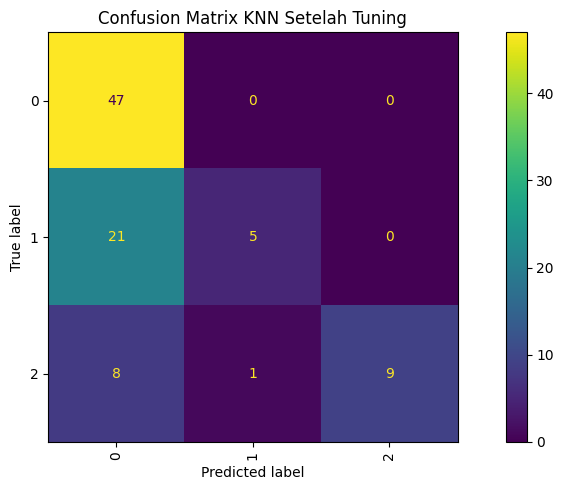

In [45]:
# Ambil hyperparameter terbaik
best_params = study_knn.best_params

# Buat model dengan parameter terbaik
best_knn = KNeighborsClassifier(
    n_neighbors=best_params["n_neighbors"],
    weights=best_params["weights"],
    metric=best_params["metric"]
)

# Latih ulang dengan data training
best_knn.fit(X_train, y_train)

# Prediksi
y_pred = best_knn.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Akurasi
accuracy_knn_opt = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Akurasi KNN setelah tuning: {accuracy_knn_opt}%")

# Confusion matrix
evaluate_model(y_test_labels, y_pred_labels, "Confusion Matrix KNN Setelah Tuning", class_labels=target_nama)

Confusion Matrix (KNN Setelah Tuning)

|                     | Predicted Low (0)   | Predicted Mid (1) | Predicted High (2) |
| ------------------- | ------------------- | ----------------- | ------------------ |
| **Actual Low (0)**  | 47                  | 0                 | 0                  |
| **Actual Mid (1)**  | 21 (False Negative) | 5                 | 0                  |
| **Actual High (2)** | 8 (False Negative)  | 1                 | 9                  |


Ringkasan Metrik:

* **Accuracy**: 67%
* **Macro avg F1-score**: 0.58
* **Weighted avg F1-score**: 0.62


Per Kelas:

* **Low Risk (0)**

  * Precision: 0.62, Recall: 1.00
  * Semua low risk dikenali dengan benar.

* **Mid Risk (1)**

  * Precision: 0.83, Recall: 0.19
  * Sama seperti sebelumnya, model masih gagal mengenali mayoritas mid risk.

* **High Risk (2)**

  * Precision: 1.00, Recall: 0.50
  * Prediksi sangat tepat saat memilih high risk, tapi hanya setengah yang dikenali.

Kesimpulan:

* Tuning meningkatkan **akurasi dari 62% → 67%**.
* Kelas **Low Risk makin dominan dikenali sempurna**.
* Kinerja di **Mid Risk tetap buruk** (hanya 5 dari 26 terdeteksi).
* **Precision membaik**, tapi recall untuk mid dan high masih rendah.


### d. Random Forest

In [46]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

In [47]:
# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest: {round(accuracy_rf* 100, 2)}%")

Akurasi Random Forest: 62.64%


              precision    recall  f1-score   support

           0       0.65      0.85      0.73        47
           1       0.42      0.19      0.26        26
           2       0.71      0.67      0.69        18

    accuracy                           0.63        91
   macro avg       0.59      0.57      0.56        91
weighted avg       0.59      0.63      0.59        91



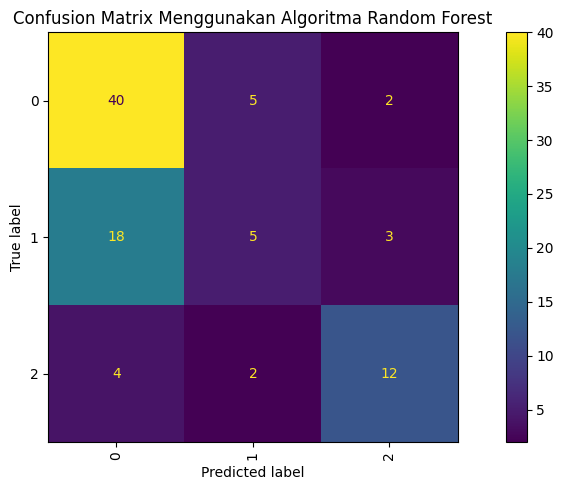

In [48]:
# Confusion Matrix
evaluate_model(y_test, y_pred, "Confusion Matrix Menggunakan Algoritma Random Forest", class_labels=target_nama)

In [49]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=100)

print("Best hyperparameters:", study_rf.best_params)
print("Best accuracy:", study_rf.best_value)

[I 2025-05-25 14:29:41,359] A new study created in memory with name: no-name-070fffa3-d180-4ce9-9d03-0e8a1d564328
[I 2025-05-25 14:29:41,647] Trial 0 finished with value: 0.6923076923076923 and parameters: {'n_estimators': 145, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.6923076923076923.
[I 2025-05-25 14:29:41,909] Trial 1 finished with value: 0.6813186813186813 and parameters: {'n_estimators': 148, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.6923076923076923.
[I 2025-05-25 14:29:42,529] Trial 2 finished with value: 0.7032967032967034 and parameters: {'n_estimators': 292, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.7032967032967034.
[I 2025-05-25 14:29:42,885] Trial 3 finished with value: 0.6263736263736264 a

Best hyperparameters: {'n_estimators': 300, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}
Best accuracy: 0.7142857142857143


Akurasi Random Forest setelah tuning: 71.43%
              precision    recall  f1-score   support

           0       0.67      0.98      0.79        47
           1       0.80      0.15      0.26        26
           2       0.88      0.83      0.86        18

    accuracy                           0.71        91
   macro avg       0.78      0.66      0.64        91
weighted avg       0.75      0.71      0.65        91



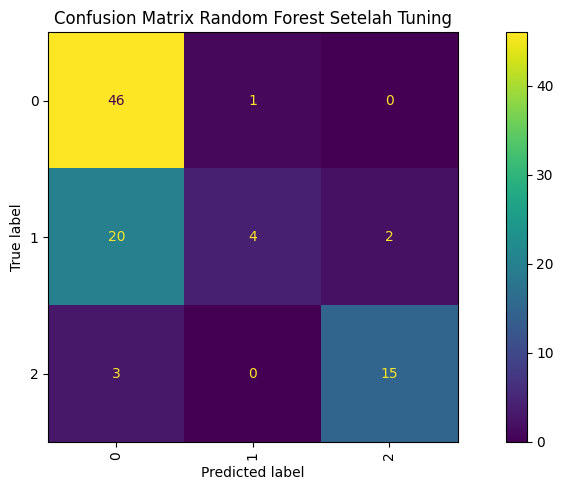

In [50]:
# Ambil hyperparameter terbaik dari hasil tuning RF
best_params_rf = study_rf.best_params

# Buat model RandomForest dengan parameter terbaik
best_rf = RandomForestClassifier(
    n_estimators=best_params_rf["n_estimators"],
    max_depth=best_params_rf["max_depth"],
    min_samples_split=best_params_rf["min_samples_split"],
    min_samples_leaf=best_params_rf["min_samples_leaf"],
    max_features=best_params_rf["max_features"],
    random_state=42,
    n_jobs=-1
)

# Latih model
best_rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = best_rf.predict(X_test)
y_pred_labels_rf = le.inverse_transform(y_pred_rf)
y_test_labels_rf = le.inverse_transform(y_test)

# Akurasi
accuracy_rf_opt = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f"Akurasi Random Forest setelah tuning: {accuracy_rf_opt}%")

# Confusion matrix
evaluate_model(y_test_labels_rf, y_pred_labels_rf, "Confusion Matrix Random Forest Setelah Tuning", class_labels=target_nama)


**Insight :**

|                     | Pred Low (0) | Pred Mid (1) | Pred High (2) |
| ------------------- | ------------ | ------------ | ------------- |
| **Actual Low (0)**  | 46           | 1            | 0             |
| **Actual Mid (1)**  | 20           | 4            | 2             |
| **Actual High (2)** | 3            | 0            | 15            |



Ringkasan Metrik:

* **Accuracy**: **71.43%**
* **Macro Avg F1-score**: 0.64
* **Weighted Avg F1-score**: 0.65

 Performa per Kelas:

* **Low Risk (0)**

  * Precision: 0.67 | Recall: 0.98 | F1-score: 0.79
  * Hampir semua low risk diprediksi benar (46 dari 47).

* **Mid Risk (1)**

  * Precision: 0.80 | Recall: 0.15 | F1-score: 0.26
  * Recall sangat rendah, model gagal mendeteksi sebagian besar mid risk.

* **High Risk (2)**

  * Precision: 0.88 | Recall: 0.83 | F1-score: 0.86
  * Kinerja sangat baik untuk high risk, baik dari segi ketepatan maupun sensitivitas.

 Kesimpulan:

* **Random Forest setelah tuning adalah model terbaik sejauh ini**, dengan:

  * Akurasi tertinggi (**71.43%**)
  * F1-score **tertinggi untuk kelas High Risk (0.86)**
* Masalah utama masih sama: kelas **Mid Risk sulit dikenali (Recall hanya 0.15)**.
* Bisa dipertimbangkan untuk menyeimbangkan data atau menggunakan teknik seperti **class weighting atau oversampling** untuk memperbaiki performa di kelas tersebut.


## **6. Evaluation and Model Selection**

In [51]:
best_accuracy_xgb = study_xgboost.best_value
best_accuracy_knn = study_knn.best_value
best_accuracy_rf  = study_rf.best_value

In [52]:
models = pd.DataFrame({
    "Model": ["XGBoost", "SVM", "Random Forest", "KNN"],
    "Akurasi": [
        accuracy_xgboost,
        accuracy_svm,
        accuracy_rf_opt,
        accuracy_knn_opt
    ]
})


# Mengurutkan data berdasarkan akurasi dari tertinggi ke terendah
models.sort_values(by = "Akurasi", ascending = False)

,Model,Akurasi
2,Random Forest,71.43
3,KNN,67.03
0,XGBoost,65.93
1,SVM,53.85


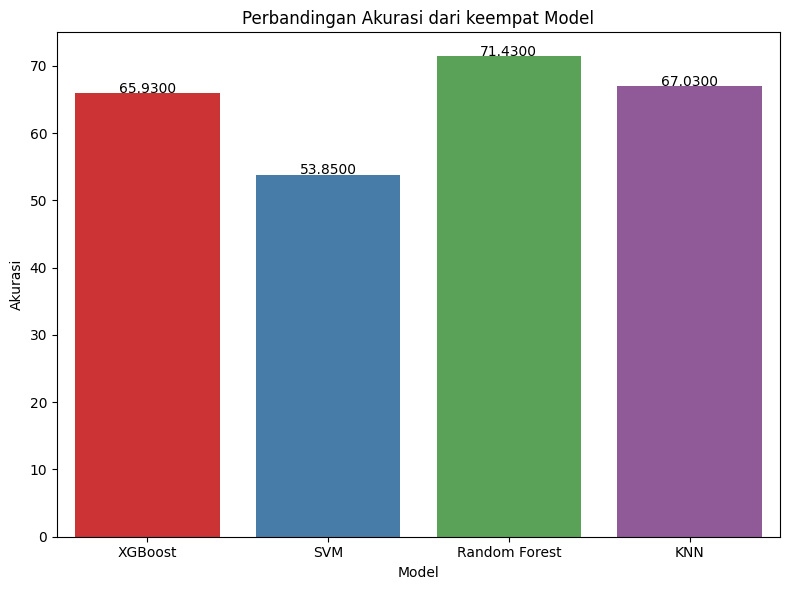

In [53]:
plt.figure(figsize=(8, 6))

palette = sns.color_palette("Set1", n_colors=len(models))
barplot = sns.barplot(data=models, x="Model", hue="Model", y="Akurasi", palette=palette)

# Menambahkan label angka di atas bar plot pada masing-masing model
for index, value in enumerate(models["Akurasi"]):
    barplot.text(index, value + 0.02, f"{value:.4f}", color="black", ha="center")

# Menambahkan judul pada plot
plt.title("Perbandingan Akurasi dari keempat Model")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Model")
plt.ylabel("Akurasi")

plt.tight_layout()
plt.show()

Akurasi Masing-Masing Model:

| Model             | Akurasi (%) |
| ----------------- | ----------- |
| **Random Forest** | **71.43**   |
| KNN               | 67.03       |
| XGBoost           | 65.93       |
| SVM               | 53.85       |

Kesimpulan:

* **Random Forest** adalah model dengan **akurasi tertinggi (71.43%)**, unggul dibanding yang lain.
* **SVM memiliki performa terendah**, dengan akurasi hanya **53.85%**, sehingga kurang cocok untuk dataset ini.
* **KNN dan XGBoost memiliki performa cukup baik**, namun masih di bawah Random Forest.
* Setelah dilakukan tuning, Random Forest tidak hanya unggul di akurasi, tapi juga memiliki **f1-score yang baik di kelas penting (seperti kelas 2/high risk)**.



# **Problem Answers**

**a. Bagaimana cara mengklasifikasikan risiko kesehatan maternal (low risk, mid risk, high risk) berdasarkan data vital pasien?**



In [54]:
# Fungsi untuk prediksi dari input user (versi fix)
def predict_from_input():
    print("=== Prediksi Risiko Kesehatan Maternal ===")
    age = float(input("Masukkan usia ibu (tahun): "))
    sys_bp = float(input("Masukkan tekanan darah sistolik: "))
    dia_bp = float(input("Masukkan tekanan darah diastolik: "))
    bs = float(input("Masukkan kadar gula darah: "))
    temp = float(input("Masukkan suhu tubuh (°F): "))
    hr = float(input("Masukkan detak jantung (bpm): "))

    # Buat dataframe
    input_sample = pd.DataFrame([{
        'Age': age,
        'SystolicBP': sys_bp,
        'DiastolicBP': dia_bp,
        'BS': bs,
        'BodyTemp': temp,
        'HeartRate': hr
    }])

    # Scaling seperti pada training
    input_sample[numerical_features] = scaler.transform(input_sample[numerical_features])

    # Ubah ke numpy array agar cocok dengan model
    input_array = input_sample.values

    # Prediksi pakai model terbaik
    pred_class = best_rf.predict(input_array)

    # Mapping hasil ke label risiko
    risk_label_map = {0: "LOW RISK", 1: "MID RISK", 2: "HIGH RISK"}
    hasil = risk_label_map.get(pred_class[0], "TIDAK DIKETAHUI")

    print(f"\n✅ Hasil klasifikasi risiko kesehatan maternal: {hasil}")

predict_from_input()

=== Prediksi Risiko Kesehatan Maternal ===
Masukkan usia ibu (tahun): 45
Masukkan tekanan darah sistolik: 100
Masukkan tekanan darah diastolik: 75
Masukkan kadar gula darah: 13
Masukkan suhu tubuh (°F): 88
Masukkan detak jantung (bpm): 100

✅ Hasil klasifikasi risiko kesehatan maternal: LOW RISK


Untuk mengklasifikasikan risiko kesehatan maternal (low risk, mid risk, high risk), digunakan data vital pasien seperti usia, tekanan darah sistolik dan diastolik, kadar gula darah, suhu tubuh, dan detak jantung. Model machine learning yang telah dilatih, dalam hal ini Random Forest yang sudah dioptimasi, akan menganalisis kombinasi dari nilai-nilai tersebut dan memprediksi tingkat risiko berdasarkan pola yang dipelajari dari data historis.

Sebagai contoh, ketika dimasukkan data seorang pasien dengan usia 45 tahun, tekanan darah 100/75 mmHg, kadar gula darah 13 mg/dL, suhu tubuh 88°F, dan detak jantung 100 bpm, model memprediksi bahwa pasien ini berada dalam kategori **Low Risk.** Ini menunjukkan bahwa meskipun pasien memiliki kadar gula darah yang cukup tinggi dan usia yang sudah cukup matang, parameter lainnya—seperti tekanan darah yang stabil dan suhu tubuh yang justru rendah—membuat keseluruhan kondisi medisnya tidak mengindikasikan risiko serius.

Prediksi ini merupakan hasil dari proses klasifikasi yang mempertimbangkan keseluruhan profil medis, bukan hanya satu indikator tunggal. Dengan pendekatan ini, model mampu memberikan rekomendasi risiko secara lebih holistik dan berbasis data, yang dapat digunakan oleh tenaga medis untuk pertimbangan awal dalam penanganan pasien.

**b. Apakah model machine learning dapat memberikan klasifikasi risiko yang akurat dan dapat diandalkan untuk membantu pengambilan keputusan dalam dunia medis, khususnya pada kasus maternal?**


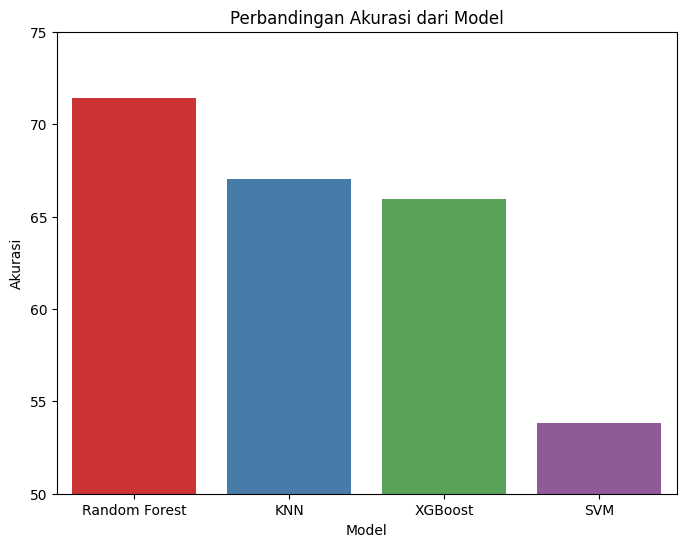

Model terbaik berdasarkan akurasi: Random Forest
Akurasi tertinggi: 71.43 %


In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat dataframe performa model
models = pd.DataFrame({
    "Model": ["XGBoost", "SVM", "Random Forest", "KNN"],
    "Akurasi": [
        accuracy_xgboost,
        accuracy_svm,
        accuracy_rf_opt,
        accuracy_knn_opt
    ]
})

# Sort dan plot
models = models.sort_values(by="Akurasi", ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=models, x="Model", hue='Model', y="Akurasi", palette="Set1")
plt.title("Perbandingan Akurasi dari Model")
plt.ylim(50, 75)
plt.show()

print("Model terbaik berdasarkan akurasi:", models.iloc[0]["Model"])
print("Akurasi tertinggi:", models.iloc[0]["Akurasi"], "%")

Berdasarkan hasil evaluasi beberapa model machine learning terhadap akurasi klasifikasi, terlihat bahwa algoritma **Random Forest** memberikan performa terbaik dengan tingkat akurasi mencapai **71,43%**. Model ini secara konsisten mengungguli model lainnya seperti **K-Nearest Neighbors (KNN)** dengan akurasi **67,03%**, **XGBoost** dengan akurasi **65,93%**, dan **Support Vector Machine (SVM)** yang memiliki performa paling rendah dengan akurasi hanya **53,85%.**

Hasil ini menunjukkan bahwa** machine learning memiliki potensi yang menjanjikan dalam memberikan klasifikasi risiko yang cukup akurat dan dapat diandalkan**, khususnya dalam konteks dunia medis seperti **kasus maternal (kehamilan dan persalinan)**. Dalam praktik klinis, kemampuan untuk mengidentifikasi risiko lebih awal secara otomatis dapat membantu tenaga medis dalam **mengambil keputusan yang lebih cepat dan tepat**, serta mengalokasikan sumber daya secara lebih efisien, terutama pada kasus-kasus berisiko tinggi.

Namun demikian, perlu dicatat bahwa meskipun akurasi model seperti Random Forest sudah cukup baik, **tingkat akurasi 71,43% masih menyisakan ruang untuk perbaikan**, baik dari sisi peningkatan kualitas data, pemilihan fitur yang lebih relevan, maupun penyempurnaan model melalui teknik seperti tuning hiperparameter atau ensemble learning lebih lanjut.

Secara keseluruhan, **penggunaan model machine learning dapat menjadi alat bantu yang sangat berharga dalam sistem pendukung keputusan medis**, tetapi tetap perlu diintegrasikan dengan penilaian klinis dari tenaga medis profesional agar hasilnya benar-benar optimal dan aman bagi pasien.

**c. Fitur apa saja yang paling berkontribusi terhadap klasifikasi risiko maternal, dan bagaimana pengaruhnya terhadap tingkat akurasi model?**


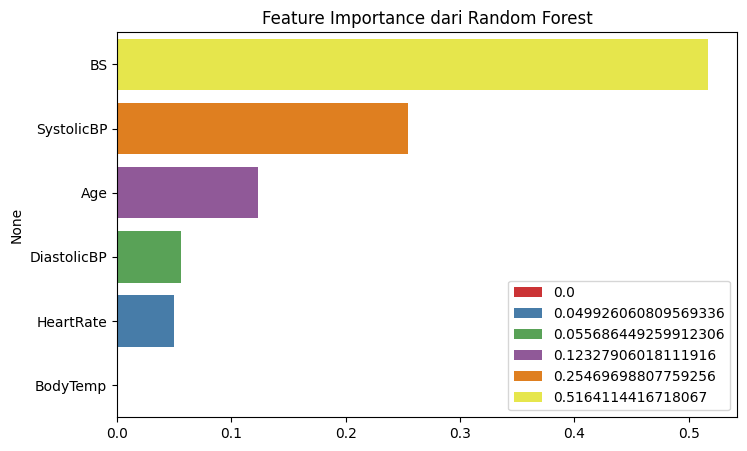

Urutan fitur berdasarkan kontribusi:
BS: 0.5164
SystolicBP: 0.2547
Age: 0.1233
DiastolicBP: 0.0557
HeartRate: 0.0499
BodyTemp: 0.0000


In [56]:
# Cek fitur penting dari Random Forest
import numpy as np

importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], hue=importances[indices], y=features[indices], palette="Set1")
plt.title("Feature Importance dari Random Forest")
plt.show()

# Print urutan fitur penting
print("Urutan fitur berdasarkan kontribusi:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

Dari nilai kontribusi tersebut, terlihat jelas bahwa **Blood Sugar (BS) merupakan fitur paling dominan** dalam memengaruhi hasil klasifikasi risiko maternal, dengan kontribusi lebih dari 50%. Ini menunjukkan bahwa kadar gula darah memiliki peranan krusial dalam membedakan tingkat risiko pada ibu hamil. SystolicBP dan Age juga memberikan kontribusi yang cukup signifikan, meskipun tidak sebesar BS. Fitur-fitur seperti DiastolicBP dan HeartRate berperan lebih kecil, sedangkan **BodyTemp tidak memberikan kontribusi sama sekali terhadap model.**

Kontribusi fitur ini memiliki pengaruh langsung terhadap akurasi model. Ketika fitur yang paling relevan dan berpengaruh digunakan secara optimal, maka model dapat membedakan pola risiko dengan lebih tepat, seperti yang tercermin dalam performa akurasi model Random Forest sebesar 71,43%. Sebaliknya, jika model diberi fitur yang kurang informatif atau tidak relevan (seperti BodyTemp), maka akan terjadi “noise” dalam data yang justru dapat menurunkan kemampuan model dalam mengenali pola penting, sehingga menurunkan akurasi.

Oleh karena itu, pemilihan dan pemanfaatan fitur yang tepat, khususnya fitur-fitur dengan kontribusi tinggi seperti BS dan SystolicBP, sangat penting dalam membangun model prediktif yang akurat dan dapat diandalkan dalam mendukung pengambilan keputusan medis, terutama untuk mendeteksi risiko maternal secara dini dan tepat sasaran.